In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import tensorflow as tf
from tensorflow import keras
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
# Specify the read-only input directory
input_data_dir = "/kaggle/input/animals10/raw-img"

# Specify the writable working directory
output_dir = "/kaggle/working/dataset"

# Create subdirectories for train, validation, and test sets
train_dir = os.path.join(output_dir, 'train')
validation_dir = os.path.join(output_dir, 'validation')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the list of class folders in the data directory
class_folders = os.listdir(input_data_dir)

# Split the class folders into training, validation, and testing sets
train_classes, remaining_classes = train_test_split(class_folders, test_size=0.4)
validation_classes, test_classes = train_test_split(remaining_classes, test_size=0.5)

# Function to copy a specified number of files from source to destination
def copy_files(src_dir, dst_dir, num_files):
    files = os.listdir(src_dir)
    num_files_to_copy = min(num_files, len(files))
    selected_files = random.sample(files, num_files_to_copy)
    for file in selected_files:
        src_path = os.path.join(src_dir, file)
        dst_path = os.path.join(dst_dir, file)
        shutil.copy(src_path, dst_path)

# Organize files into subdirectories for each split
for folder in class_folders:
    class_dir = os.path.join(input_data_dir, folder)

    train_class_dir = os.path.join(train_dir, folder)
    validation_class_dir = os.path.join(validation_dir, folder)
    test_class_dir = os.path.join(test_dir, folder)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    copy_files(class_dir, train_class_dir, num_files=15707 // len(class_folders))
    copy_files(class_dir, validation_class_dir, num_files=5236 // len(class_folders))
    copy_files(class_dir, test_class_dir, num_files=5236 // len(class_folders))

# Print the number of files in each set
print("Number of training files:", sum(len(os.listdir(os.path.join(train_dir, folder))) for folder in class_folders))
print("Number of validation files:", sum(len(os.listdir(os.path.join(validation_dir, folder))) for folder in class_folders))
print("Number of testing files:", sum(len(os.listdir(os.path.join(test_dir, folder))) for folder in class_folders))


Number of training files: 15576
Number of validation files: 5230
Number of testing files: 5230


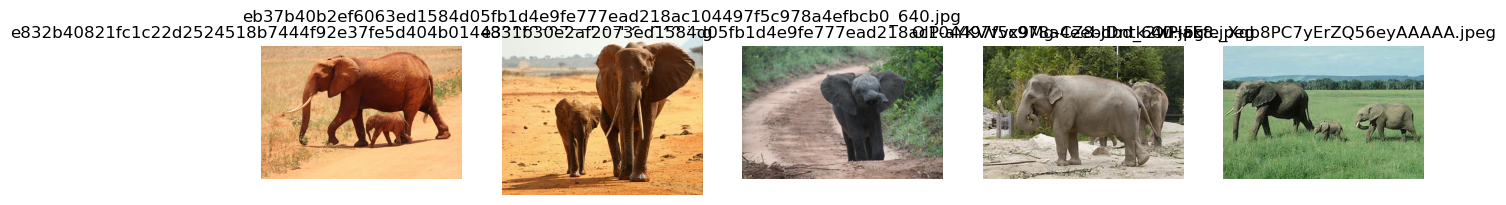

In [3]:

# Set the path to the train directory
train_dir = "/kaggle/working/dataset/train"

# Get the list of class subfolders in the train directory
class_folders = os.listdir(train_dir)

# Choose a random class from which to display images
random_class = random.choice(class_folders)

# Get the path to the random class directory
class_dir = os.path.join(train_dir, random_class)

# Get a list of image files in the class directory
image_files = os.listdir(class_dir)

# Choose five random images to display
random_images = random.sample(image_files, 5)

# Display the selected images
plt.figure(figsize=(15, 7))
for i, image_file in enumerate(random_images):
    img_path = os.path.join(class_dir, image_file)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.show()

In [4]:
#convert to tensoflow dataset
test_dir = "/kaggle/working/dataset/test"
train_dir = "/kaggle/working/dataset/train"
validation_dir = "/kaggle/working/dataset/validation"

# Define constants
batch_size = 32
image_size = (180, 180)  # Adjust image size as needed


# Load datasets using tf.keras.utils.image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 15576 files belonging to 10 classes.
Found 5230 files belonging to 10 classes.
Found 5230 files belonging to 10 classes.


In [5]:
#Build the model
inputs = keras.Input(shape=(180, 180, 3))
#Rescale inputs to the [0, 1] range by dividing them by 255.
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856 

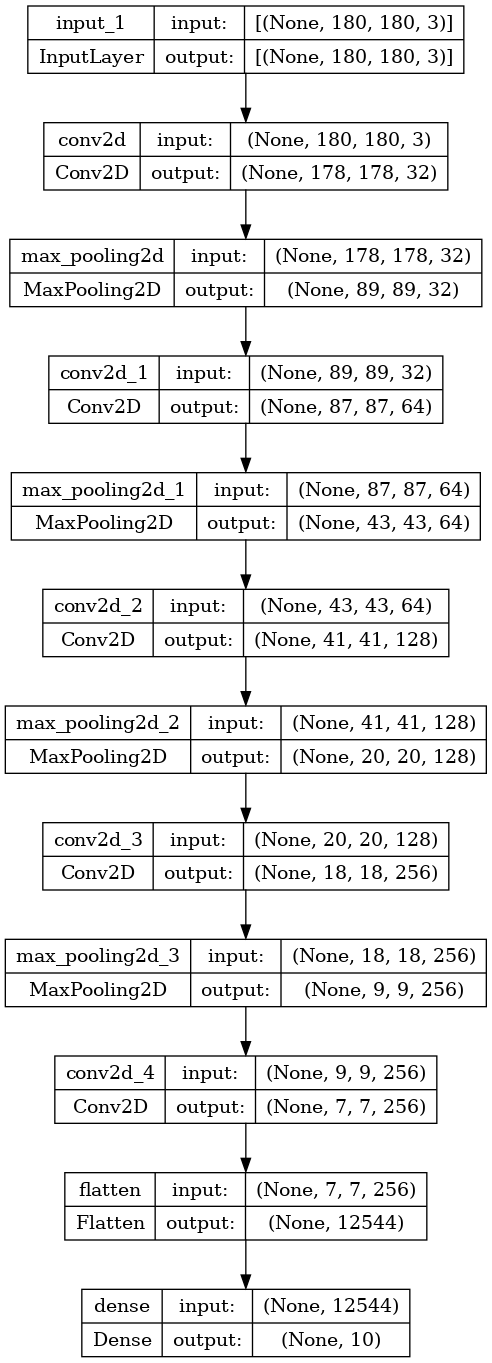

In [7]:
#Create a graphical representation of the model
keras.utils.plot_model(model, "animals_model.png", show_shapes=True)

In [8]:
#Configuring the model for training
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [9]:
# Define the EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',   
    patience=10,           
    restore_best_weights=True  
)

# Define the ModelCheckpoint callback
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss"
)

# Combine both callbacks
callbacks = [early_stop, model_checkpoint]

# Fit the model using the Dataset
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/50
487/487 [==============================] - 47s 64ms/step - loss: 3.1636 - accuracy: 0.1893 - val_loss: 2.3229 - val_accuracy: 0.2600
Epoch 2/50
487/487 [==============================] - 35s 70ms/step - loss: 2.1585 - accuracy: 0.2895 - val_loss: 1.9394 - val_accuracy: 0.3394
Epoch 3/50
487/487 [==============================] - 30s 62ms/step - loss: 1.8748 - accuracy: 0.3613 - val_loss: 1.7986 - val_accuracy: 0.3769
Epoch 4/50
487/487 [==============================] - 35s 71ms/step - loss: 1.7045 - accuracy: 0.4131 - val_loss: 1.6141 - val_accuracy: 0.4430
Epoch 5/50
487/487 [==============================] - 31s 64ms/step - loss: 1.5728 - accuracy: 0.4623 - val_loss: 1.5160 - val_accuracy: 0.4774
Epoch 6/50
487/487 [==============================] - 31s 63ms/step - loss: 1.4618 - accuracy: 0.5021 - val_loss: 1.4749 - val_accuracy: 0.4977
Epoch 7/50
487/487 [==============================] - 30s 62ms/step - loss: 1.3698 - accuracy: 0.5349 - val_loss: 1.4181 - val_accuracy:

In [10]:
#leveraging pretrained model 
pre_model = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = pre_model.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 29ms/step


In [12]:
train_features.shape

(15576, 5, 5, 512)

In [13]:
test_features.shape

(5230, 5, 5, 512)

In [14]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(64)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [15]:
#Configuring the model for training
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [16]:
# Define the EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',   
    patience=10,           
    restore_best_weights=True  
)

# Define the ModelCheckpoint callback
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction.keras",
    save_best_only=True,
    monitor="val_loss"
)

# Combine both callbacks
callbacks = [early_stop, model_checkpoint]

# Fit the model using the Dataset
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)


Epoch 1/50
487/487 [==============================] - 4s 6ms/step - loss: 25.2961 - accuracy: 0.3952 - val_loss: 5.2418 - val_accuracy: 0.7591
Epoch 2/50
487/487 [==============================] - 2s 5ms/step - loss: 9.8727 - accuracy: 0.6795 - val_loss: 3.1866 - val_accuracy: 0.8528
Epoch 3/50
487/487 [==============================] - 2s 4ms/step - loss: 6.9736 - accuracy: 0.7639 - val_loss: 2.4647 - val_accuracy: 0.8880
Epoch 4/50
487/487 [==============================] - 2s 5ms/step - loss: 5.6123 - accuracy: 0.8019 - val_loss: 2.0370 - val_accuracy: 0.9031
Epoch 5/50
487/487 [==============================] - 2s 4ms/step - loss: 4.7618 - accuracy: 0.8243 - val_loss: 1.7795 - val_accuracy: 0.9136
Epoch 6/50
487/487 [==============================] - 2s 5ms/step - loss: 4.0706 - accuracy: 0.8453 - val_loss: 1.6046 - val_accuracy: 0.9231
Epoch 7/50
487/487 [==============================] - 2s 4ms/step - loss: 3.7554 - accuracy: 0.8597 - val_loss: 1.4159 - val_accuracy: 0.9302
Epoch

In [17]:
#finetune the model 
pre_model.trainable = True
for layer in pre_model.layers[:-4]: 
    layer.trainable = False


In [18]:
#Configuring the model for training
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

# Define the EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',   
    patience=10,           
    restore_best_weights=True  
)

# Define the ModelCheckpoint callback
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="fine_tuning.keras",
    save_best_only=True,
    monitor="val_loss"
)

# Combine both callbacks
callbacks = [early_stop, model_checkpoint]

# Fit the model using the Dataset
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)


Epoch 1/50
487/487 [==============================] - 4s 7ms/step - loss: 0.4151 - accuracy: 0.9687 - val_loss: 0.5674 - val_accuracy: 0.9788
Epoch 2/50
487/487 [==============================] - 2s 5ms/step - loss: 0.4040 - accuracy: 0.9695 - val_loss: 0.5629 - val_accuracy: 0.9793
Epoch 3/50
487/487 [==============================] - 2s 5ms/step - loss: 0.4116 - accuracy: 0.9702 - val_loss: 0.5492 - val_accuracy: 0.9809
Epoch 4/50
487/487 [==============================] - 2s 5ms/step - loss: 0.4223 - accuracy: 0.9694 - val_loss: 0.5660 - val_accuracy: 0.9792
Epoch 5/50
487/487 [==============================] - 2s 4ms/step - loss: 0.4018 - accuracy: 0.9701 - val_loss: 0.5386 - val_accuracy: 0.9809
Epoch 6/50
487/487 [==============================] - 2s 5ms/step - loss: 0.3568 - accuracy: 0.9716 - val_loss: 0.5443 - val_accuracy: 0.9797
Epoch 7/50
487/487 [==============================] - 2s 4ms/step - loss: 0.3602 - accuracy: 0.9714 - val_loss: 0.5751 - val_accuracy: 0.9803
Epoch 

In [19]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")


164/164 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.9816
Test accuracy: 0.982
